# ***Finding the Center of mass of the Sphere using 2D Integration***

## *importing the modules and packages, Configuration of the Figs and Data directories*

In [1]:
include("Q2-MCNDIM.jl")
using Plots, LaTeXStrings, StatsPlots, StatsBase, Distributions, JLD, ProgressMeter, SpecialFunctions, Latexify, DataFrames, BenchmarkTools
figpath = "../../Figs/Q2/"
datapath = "../../Data/Q2/"
Plots.default(titlefontsize = 12, tickfontsize = 10, labelfontsize = 12,
    fontfamily = "Computer Modern", frame = :box, label = nothing)

### ***Explaination of how to find the Center of Mass:***
***$$R_{CoM} = \frac{I}{M} \Rightarrow R_{CoM} = \frac{\int_{Sphere} z \rho dV}{\int_{Sphere} \rho dV},\ \rho = \rho_0 (3 + \frac{r}{R} \cos{\theta}) \Rightarrow$$***
***$$ R_{CoM} = \frac{\int_0^R\int_0^\pi (3+\frac{r}{R}\cos{\theta})r^3\sin{\theta}\cos{\theta} d\theta dr}{\int_0^R\int_0^\pi (3+\frac{r}{R}\cos{\theta})r^2\sin{\theta} d\theta dr}$$***

*$we\ consider\ R\ =\ 1$*


### *exact answer of integration:*

In [45]:
Answerₑ = 1/15
ex = :(R / 15 = $Answerₑ)
latexify(ex)

L"$\frac{R}{15} = 0.06666666666666667$"

## *Calculating $I$:* $$I = \int_0^R\int_0^\pi (3+\frac{r}{R}\cos{\theta})r^3\sin{\theta}\cos{\theta} d\theta dr$$

In [2]:
ISMCParameters = Dict(:f => (r, θ) -> r^3 * sin(θ) * cos(θ) * (3 + r * cos(θ)), :R₁ => 1, :Ŋ => 10^4)

samples = 100000
IσData = Float64[]
IIData = Float64[]
Prog = Progress(samples)

for n ∈ 1:samples
    Int = NDMCIntegrate.SMC(; ISMCParameters...)
    push!(IIData, Int[1])
    push!(IσData, Int[2])
    next!(Prog)
end
save(datapath * "I_data.jld", "IIData", IIData, "IσData", IσData)

Progress: 100%|█████████████████████████████████████████| Time: 0:03:09


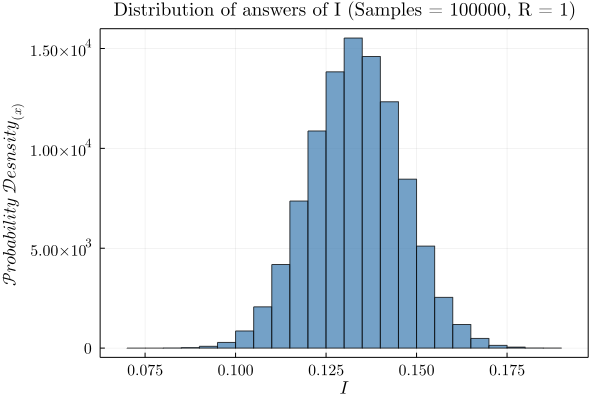

In [3]:
IHistPlot = begin
    histogram(IIData, bins = 50, c = :steelblue, alpha = 0.75)
    plot!(xlabel = L"I", ylabel = L"\mathcal{Probability\ Desnsity}_{(x)}",
        title = "Distribution of answers of I (Samples = $samples, R = 1)")
end
savefig(IHistPlot, figpath * "IHistPlot.pdf")
display(IHistPlot)

In [4]:
ISMCParameters = Dict(:f => (r, θ) -> r^3 * sin(θ) * cos(θ) * (3 + r * cos(θ)), :R₁ => 1, :Ŋ => 10^8)
I, σᵢ = NDMCIntegrate.SMC(; ISMCParameters...)
latexify(:(I = $I, σ_I = $σᵢ))

L"$I = 0.13318539827659917, \sigma_{I} = 4.072650751867545e-5$"

## *Calculating $M$:* $$M = \int_0^R\int_0^\pi (3+\frac{r}{R}\cos{\theta})r^2\sin{\theta} d\theta dr$$

In [5]:
MSMCParameters = Dict(:f => (r, θ) -> r^2 * sin(θ) * (3 + r * cos(θ)), :R₁ => 1, :Ŋ => 10^4)

samples = 100000
MσData = Float64[]
MIData = Float64[]
Prog = Progress(samples)

for n ∈ 1:samples
    Int = NDMCIntegrate.SMC(; MSMCParameters...)
    push!(MIData, Int[1])
    push!(MσData, Int[2])
    next!(Prog)
end
save(datapath * "M_data.jld", "MIData", MIData, "MσData", MσData)

Progress: 100%|█████████████████████████████████████████| Time: 0:02:42


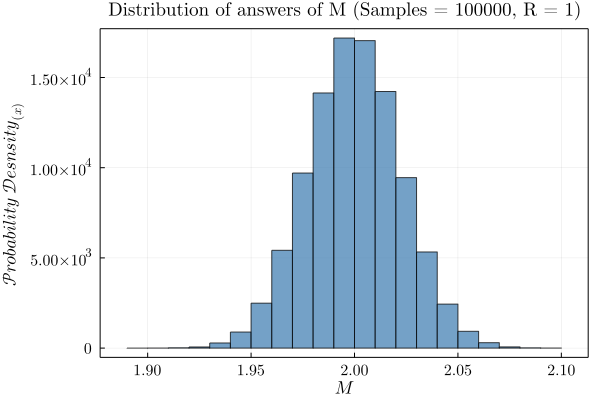

In [6]:
MHistPlot = begin
    histogram(MIData, bins = 30, c = :steelblue, alpha = 0.75)
    plot!(xlabel = L"M", ylabel = L"\mathcal{Probability\ Desnsity}_{(x)}",
        title = "Distribution of answers of M (Samples = $samples, R = 1)")
end
savefig(MHistPlot, figpath * "MHistPlot.pdf")
display(MHistPlot)

In [7]:
MSMCParameters = Dict(:f => (r, θ) -> r^2 * sin(θ) * (3 + r * cos(θ)), :R₁ => 1, :Ŋ => 10^8)
M, σₘ = NDMCIntegrate.SMC(; MSMCParameters...)
latexify(:(M = $M, σ_M = $σₘ))

L"$M = 2.0003628720378823, \sigma_{M} = 7.160102158795576e-5$"

## *final answer:*

In [44]:
R = I / M
latexify(:(R = $R))

L"$R = 0.0665806190158467$"